In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset1 = pd.read_csv('data.csv')

data = {'Input': range(100), 'Output': range(100)}
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
X = dataset1[['Input']].values
y = dataset1[['Output']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1, 8)
    self.fc2 = nn.Linear(8, 10)
    self.fc3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()
    self.history = {'loss': []}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()

    output = ai_brain(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 13080.932617
Epoch [200/2000], Loss: 10300.128906
Epoch [400/2000], Loss: 6002.348633
Epoch [600/2000], Loss: 2507.239258
Epoch [800/2000], Loss: 1445.061890
Epoch [1000/2000], Loss: 1188.538330
Epoch [1200/2000], Loss: 857.140625
Epoch [1400/2000], Loss: 513.883850
Epoch [1600/2000], Loss: 216.689392
Epoch [1800/2000], Loss: 44.402260


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 7.950893


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)


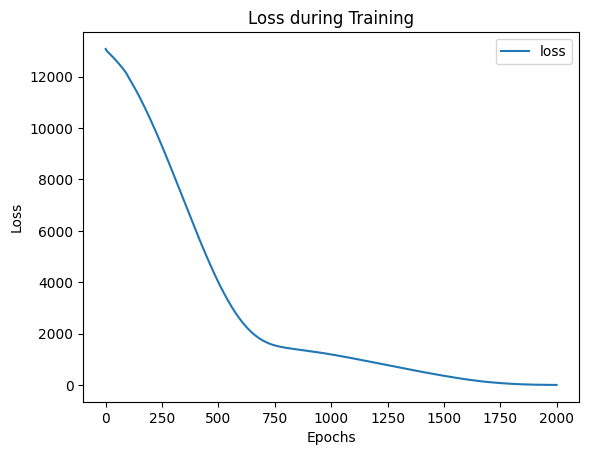

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 91.30337524414062


In [ ]:
X_n2_2 = torch.tensor([[10]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 91.30337524414062
